# Utilizando KNN (K – Nearest Neighbours)

Conheça mais em http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Vamos utilizar os mesmos dados de medidas das Iris Setosa, só que agora vamos baixar diretamente o dataset do sklearn

In [1]:
# Vamos primeiramente importar as bibliotecas
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from scipy import stats

## Investigando os dados de IRIS

In [2]:
# Importando o dataset iris
from sklearn.datasets import load_iris
data = load_iris()

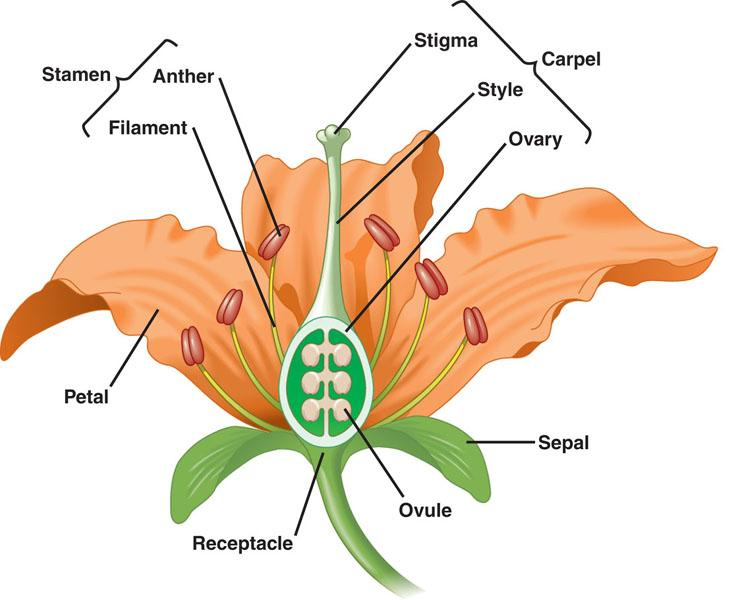

In [3]:
# Este arquivo possui as medidas de várias espécies da flor Iris Setosa. Veja como é essa flor abaixo:
from IPython.display import Image
Image(filename='iris.jpg') 

In [4]:
# Vamos ver como são os dados
data

{'data': array([[ 5.1,  3.5,  1.4,  0.2],
        [ 4.9,  3. ,  1.4,  0.2],
        [ 4.7,  3.2,  1.3,  0.2],
        [ 4.6,  3.1,  1.5,  0.2],
        [ 5. ,  3.6,  1.4,  0.2],
        [ 5.4,  3.9,  1.7,  0.4],
        [ 4.6,  3.4,  1.4,  0.3],
        [ 5. ,  3.4,  1.5,  0.2],
        [ 4.4,  2.9,  1.4,  0.2],
        [ 4.9,  3.1,  1.5,  0.1],
        [ 5.4,  3.7,  1.5,  0.2],
        [ 4.8,  3.4,  1.6,  0.2],
        [ 4.8,  3. ,  1.4,  0.1],
        [ 4.3,  3. ,  1.1,  0.1],
        [ 5.8,  4. ,  1.2,  0.2],
        [ 5.7,  4.4,  1.5,  0.4],
        [ 5.4,  3.9,  1.3,  0.4],
        [ 5.1,  3.5,  1.4,  0.3],
        [ 5.7,  3.8,  1.7,  0.3],
        [ 5.1,  3.8,  1.5,  0.3],
        [ 5.4,  3.4,  1.7,  0.2],
        [ 5.1,  3.7,  1.5,  0.4],
        [ 4.6,  3.6,  1. ,  0.2],
        [ 5.1,  3.3,  1.7,  0.5],
        [ 4.8,  3.4,  1.9,  0.2],
        [ 5. ,  3. ,  1.6,  0.2],
        [ 5. ,  3.4,  1.6,  0.4],
        [ 5.2,  3.5,  1.5,  0.2],
        [ 5.2,  3.4,  1.4,  0.2],
      

In [5]:
# Vamos imprimir um resumo desses dados:
print ('Chaves do dataset: ', data.keys())
print ('Tamanho dos dados (linhas,colunas): ', data.data.shape)
print ('Formato dos dados: ', data.feature_names)
print ('Espécies de Iris: ', data.target_names)

Chaves do dataset:  dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
Tamanho dos dados (linhas,colunas):  (150, 4)
Formato dos dados:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Espécies de Iris:  ['setosa' 'versicolor' 'virginica']


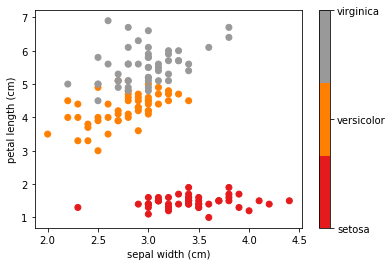

In [6]:
# Vamos imprimir a relação entre "sepal length" x "sepal width"
plt.scatter(data.data[:, 1], data.data[:, 2],
            c=data.target, cmap=plt.cm.get_cmap('Set1', 3))
plt.xlabel(data.feature_names[1])
plt.ylabel(data.feature_names[2])

color_bar_formating = plt.FuncFormatter(lambda i, *args: data.target_names[int(i)])
plt.colorbar(ticks = [0,1,2], format = color_bar_formating)

Veja que existe uma certa relação entre essas duas variáveis e 3 espécies da Iris

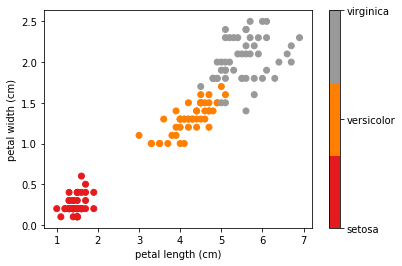

In [7]:
# Vamos fazer o mesmo para as medidas "petal length" x "pepal width"
plt.scatter(data.data[:, 2], data.data[:, 3],
            c=data.target, cmap=plt.cm.get_cmap('Set1', 3))
plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])

color_bar_formating = plt.FuncFormatter(lambda i, *args: data.target_names[int(i)])
plt.colorbar(ticks = [0,1,2], format = color_bar_formating)

Aqui também podemos ver uma forte relação entre as variáveis plotadas "petal length" x "pepal width" e as espécies de Iris

In [8]:
df = pd.DataFrame(data.data[:], columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']) 
df['target'] = data.target

In [9]:
df['target'].unique()

array([0, 1, 2], dtype=int64)

In [10]:
df['target_name'] = df.apply(lambda row: data.target_names[int(row.target)], axis=1)

In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


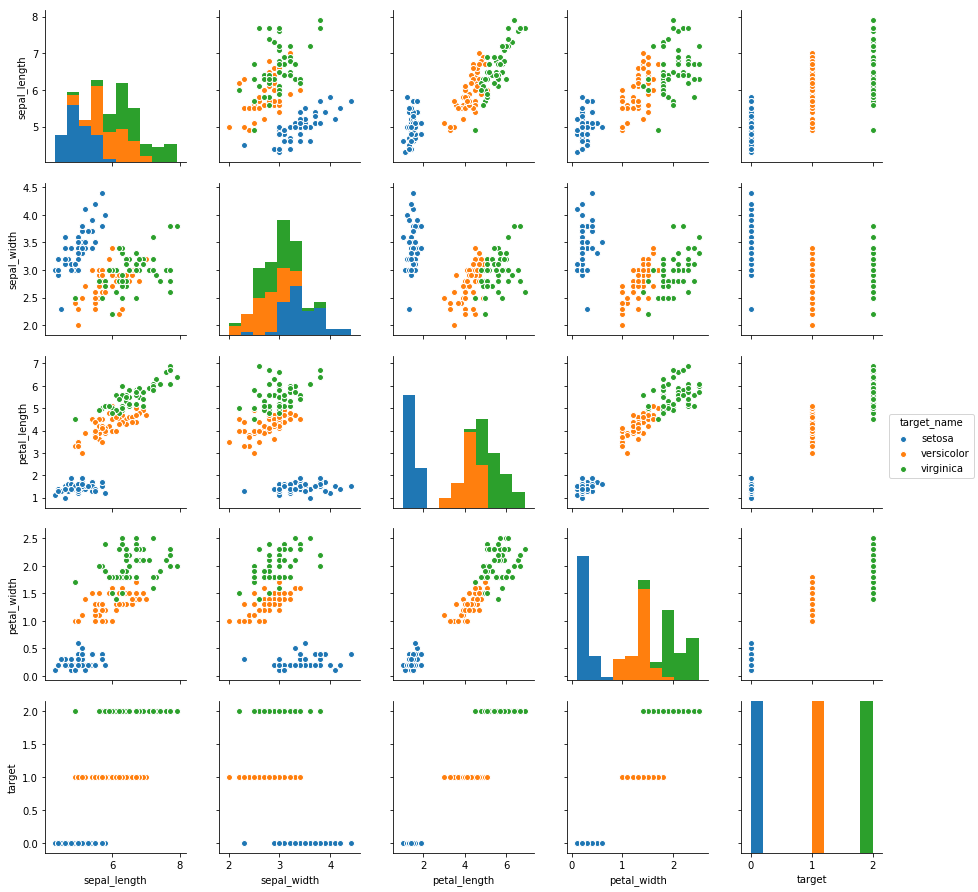

In [12]:
# Plotando os gráficos entre as variáveis
sb.pairplot(df, hue='target_name') 

Nos gráficos acima vemos a plotagem de todas as possíveis combinações entre as variáveis. 
Novamente podemos ver que os gráficos que possuem mais forte correlação são entre as variáveis  'petal_length' x 'petal_width'

## Usando KNN (K – Nearest Neighbours) para gerar um modelo de previsão

In [13]:
# Importando as bibliotecas do Scikit-learn para KNN
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [14]:
# Separando os dados de variáveis (X) do resultado (y)
X, y = data.data, data.target

In [15]:
X.shape

(150, 4)

In [16]:
y.shape

(150,)

In [17]:
# Definindo o modelo KNN
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [18]:
# Treinando o modelo com X e y
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [19]:
# Fazendo uma previsão de valores fictícios (2cm x 2cm sepal - 4cm x 2cm petal)
ex1 = [2, 2, 4, 2]
output = knn.predict([ex1,]) 
print ('Espécie prevista:', data.target_names[output][0])
print ('Probabilidades:') 
print ('  Espécies:', data.target_names)
print ('  Probab. :', knn.predict_proba([ex1, ]))

Espécie prevista: versicolor
Probabilidades:
  Espécies: ['setosa' 'versicolor' 'virginica']
  Probab. : [[ 0.   0.8  0.2]]


In [20]:
# Vamos agora separar nossa base em dados de treinamento e teste. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
y_train = y_train.ravel()
y_test = y_test.ravel()

In [21]:
# Veja que possui apenas 105 exemplos para a massa de treinamento
X_train.shape

(105, 4)

In [22]:
# 45 exemplos foram separados para a massa de teste
X_test.shape

(45, 4)

In [23]:
# Criando e treinando o modelo com os novos dados de treinamento
neigh = neighbors.KNeighborsClassifier(n_neighbors = 5, weights='uniform', algorithm='auto')
neigh.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [24]:
y_pred = neigh.predict(X_test)
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K = 5")

Accuracy is  97.7777777778 % for K = 5


In [25]:
# Finalmente, vamos executar o mesmo processo com vários valores de K para ver se conseguimos aumentar a precisão
results_x = []
results_y = []
for K in range(20):
    K_value = K+1
    neigh = neighbors.KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(X_train, y_train) 
    y_pred = neigh.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)*100
    print ("Accuracy is ", accuracy,"% for K-Value:",K_value)
    results_x.append(K_value)
    results_y.append(accuracy)    

Accuracy is  97.7777777778 % for K-Value: 1
Accuracy is  97.7777777778 % for K-Value: 2
Accuracy is  97.7777777778 % for K-Value: 3
Accuracy is  95.5555555556 % for K-Value: 4
Accuracy is  97.7777777778 % for K-Value: 5
Accuracy is  97.7777777778 % for K-Value: 6
Accuracy is  100.0 % for K-Value: 7
Accuracy is  97.7777777778 % for K-Value: 8
Accuracy is  100.0 % for K-Value: 9
Accuracy is  100.0 % for K-Value: 10
Accuracy is  100.0 % for K-Value: 11
Accuracy is  100.0 % for K-Value: 12
Accuracy is  100.0 % for K-Value: 13
Accuracy is  97.7777777778 % for K-Value: 14
Accuracy is  97.7777777778 % for K-Value: 15
Accuracy is  97.7777777778 % for K-Value: 16
Accuracy is  97.7777777778 % for K-Value: 17
Accuracy is  97.7777777778 % for K-Value: 18
Accuracy is  97.7777777778 % for K-Value: 19
Accuracy is  95.5555555556 % for K-Value: 20


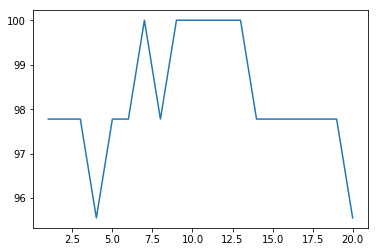

In [26]:
# Finalmente, vamos plotar o resultado da acurácia versos o valor de K
plt.plot(results_x,results_y)

## Exercício 5

Execute novamente para mais valores de K e plote o resultado, adicionando no gráfico o título e legendas dos eixos.

Responda a pergunta: Qual a melhor acurácia foi possível obter? Qual o valor de K foi utilizado?
    
Salve este Jupyter com outro nome: 04_KNN_Fulano